Dog Breed Image Dataset from Khushi available at:
https://www.kaggle.com/datasets/khushikhushikhushi/dog-breed-image-dataset

Usable under MIT License

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [3]:
#creating path to dataset
#creating an array of labels/bins
labels = []

for label in os.listdir('dataset'):
   labels.append(label)

#check to make sure data/labels loaded correctly
print(labels)

#we havr an array of labels and a link

['Beagle', 'Boxer', 'Bulldog', 'Dachshund', 'German_Shepherd', 'Golden_Retriever', 'Labrador_Retriever', 'Poodle', 'Rottweiler', 'Yorkshire_Terrier']


In [4]:
#print images

In [5]:
#getting paths to classes and images, resizing images, populating class and image arrays
classes = []
images = []
size = (256,256)

for label in labels:
    for image in os.listdir(os.path.join('dataset', label)):
        image_path = os.path.join('dataset', label, image) #link to image
        img = cv2.imread(image_path) #photos in color, three channels for RGB
        img = cv2.resize(img, size) #resize images to (256,256)
        #print('Image Dimensions :', img.shape) --All images are (128, 128, 3)
        img = np.array(img) #cast the image as an array
        images.append(img)
        classes.append(label)

#checking population of arrays
#print(classes[1])
#print(images[1])

In [6]:
#converting from list to array
X = np.array(images)
y = np.array(classes)

#want to normalize x values as percentages
X = X/255

#encoding classes
LE = LabelEncoder()
y = LE.fit_transform(y)
#encoding to solve issue with cce
y = tf.keras.utils.to_categorical(y)

#check array popoulation again
#print(X)
#print(y)

In [7]:
#splitting data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=12)

#printing split data
#print(f'X_train shape: {X_train.shape}')
#print(f'X_val shape: {X_val.shape}')
#print(f'y_train shape: {y_train.shape}')
#print(f'y_val shape: {y_val.shape}')

Breakdown on layers

https://datascience.stackexchange.com/questions/44124/when-to-use-dense-conv1-2d-dropout-flatten-and-all-the-other-layers

In [8]:
#model time!!
SIZE = 256
input_shape = (SIZE, SIZE, 3)

model = keras.Sequential([
    keras.Input(shape=input_shape),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(labels), activation='softmax') #dense 10
])

model.summary()

# Compile the model --uses cce, is why we encoding
# https://stackoverflow.com/questions/63493324/what-does-model-compile-do-in-keras-tensorflow
# ^ link for math behind function
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 303,818 (1.16 MB)

 Trainable params: 303,818 (1.16 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
#model training
model_history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val)
)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.1044 - loss: 2.3072 - val_accuracy: 0.0825 - val_loss: 2.3037
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.1033 - loss: 2.3024 - val_accuracy: 0.0825 - val_loss: 2.3074
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.1101 - loss: 2.3007 - val_accuracy: 0.1340 - val_loss: 2.2969
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.1309 - loss: 2.2795 - val_accuracy: 0.2784 - val_loss: 2.1421
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.2133 - loss: 2.0789 - val_accuracy: 0.3351 - val_loss: 2.0335
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.3194 - loss: 1.8848 - val_accuracy: 0.4021 - val_loss: 1.7511
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.4532 - loss: 1.5191 - val_accuracy: 0.5825 - val_loss: 1.3876
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.5507 - loss: 1.2534 - val_accuracy: 0.7423 - val_loss:

to improve accuracy try changing activation function, adding layers, or changing batch size

batch size: https://medium.com/geekculture/how-does-batch-size-impact-your-model-learning-2dd34d9fb1fa

affects training: https://mljourney.com/how-does-batch-size-affect-training/

with batch size, tune hyperparameters
https://medium.com/@cmugendi3/improving-model-performance-tips-and-tricks-for-hyperparameter-tuning-a6d63c931457

In [10]:
val_loss, val_accuracy = model.evaluate(X_val, y_val)

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 198ms/step - accuracy: 0.9950 - loss: 0.0944


In [11]:
print("Evaluate on test data")
results = model.evaluate(X_val, y_val, batch_size=128)
print("test loss, test acc:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model.predict(X_val[:3])
print("predictions shape:", predictions.shape)

Evaluate on test data
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 502ms/step - accuracy: 0.9940 - loss: 0.1132
test loss, test acc: [0.09664102643728256, 0.9948453903198242]
Generate predictions for 3 samples
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
predictions shape: (3, 10)


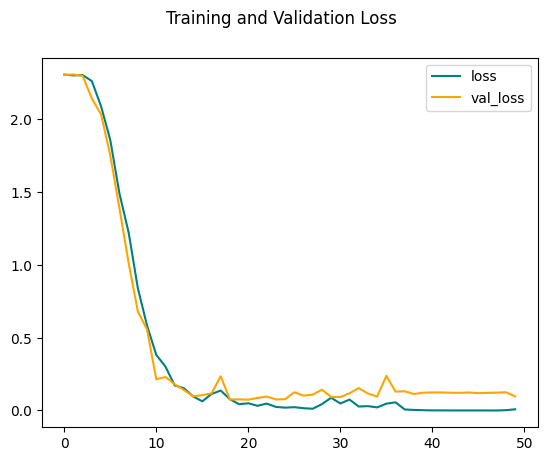

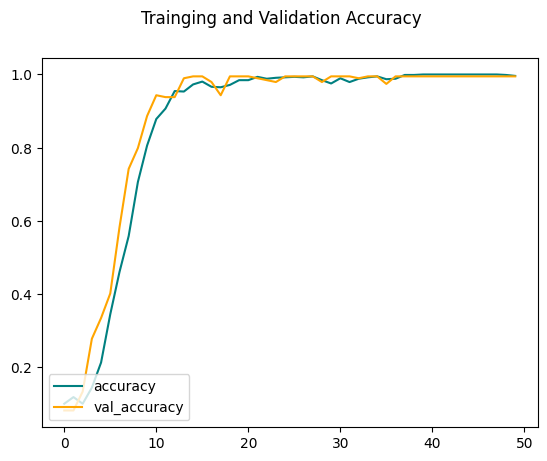

In [12]:
fig = plt.figure()
plt.plot(model_history.history['loss'], color='teal', label='loss')
plt.plot(model_history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Training and Validation Loss')
plt.legend(loc="upper right")
plt.show()

fig = plt.figure()
plt.plot(model_history.history['accuracy'], color='teal', label='accuracy')
plt.plot(model_history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Trainging and Validation Accuracy')
plt.legend(loc="lower left")
plt.show()

model.save('DogBreedClassifer.keras')

In [13]:
#model predictions
#if needed, you would load model here with 
#model = load_model('DogBreedClassifer.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


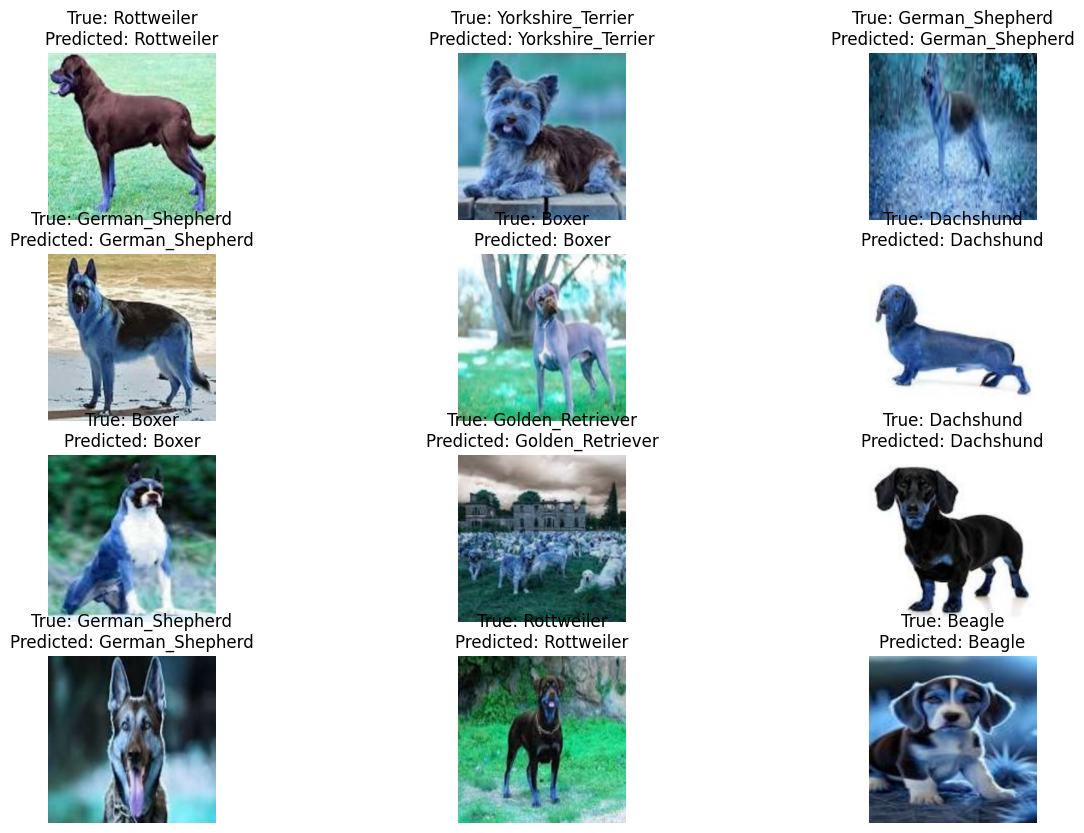

In [14]:
#debugged with code from Swarnabh Das

# Function to plot images along with their predictions and actual labels
def plot_predictions(model, X_val, y_val, label_encoder, num_images):
    # Pick 6 random indices from the validation set
    indices = np.random.choice(len(X_val), num_images, replace=False)
    
    # Get the images and labels corresponding to those indices
    images = X_val[indices]
    true_labels = y_val[indices]
    
    # Predict the labels for those images
    predictions = model.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)
    
    # Decode the predicted and true labels
    true_labels_decoded = np.argmax(true_labels, axis=1)
    true_labels_names = label_encoder.inverse_transform(true_labels_decoded)
    predicted_labels_names = label_encoder.inverse_transform(predicted_labels)
    # Plot the images along with the actual and predicted labels
    plt.figure(figsize=(15, 10))
    for i in range(num_images):
        plt.subplot(4, 3, i + 1)
        plt.imshow(images[i])
        plt.title(f'True: {true_labels_names[i]}\nPredicted: {predicted_labels_names[i]}')
        plt.axis('off')
    
    plt.show()

# Call the function to plot predictions
plot_predictions(model, X_val, y_val, LE, 12)